<a href="https://colab.research.google.com/github/quetion/time_series_11202/blob/main/%5B6%5DARCH%E4%BC%B0%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARCH 模型
## 波動率建模
- 建構時間序列波動率模型
- 考慮AR(1)模型
- 可推算出$y_{t+1}$在時間$t$的條件期望值
- 也可推算$y_{t+1}$在時間$t$的條件變異數
## 問題
- 上述方法的波動率不會隨時間變動而變動
- 波動率的特性
  - time-varying volatility
  - volatility clustering
- 此外, 報酬率通常呈現厚尾



In [8]:
# 安裝套件
!pip install arch

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
# arch套件
from arch import arch_model

In [10]:
# 傳統建立波動率的方式
data = yf.download('^gspc',start='2020-01-01')
data.index = pd.to_datetime(data.index)
data = data[['Adj Close']]
data.columns = ['price_spx']
data['ret_spx'] = data.price_spx.pct_change()

[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-2fa212426b7e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ret_spx'] = data.price_spx.pct_change()


<Axes: xlabel='Date'>

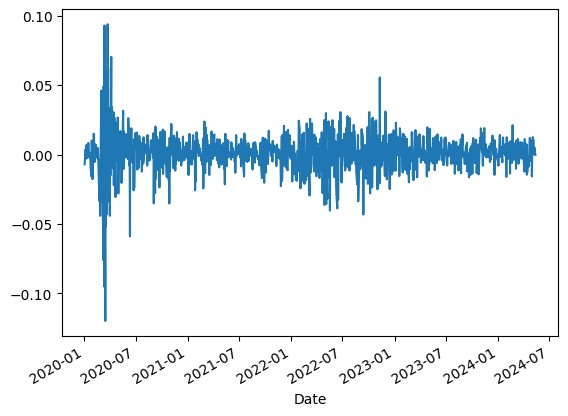

In [14]:
# 建構波動率
#data.price_spx.plot()
data.ret_spx.plot()

In [16]:
data.ret_spx.dropna().std()
data.ret_spx.describe()

count    1097.000000
mean        0.000529
std         0.014035
min        -0.119841
25%        -0.005661
50%         0.000819
75%         0.007460
max         0.093828
Name: ret_spx, dtype: float64

In [27]:
data['2024':'2024'].ret_spx.dropna().std()*np.sqrt(252)
# 大盤波動率: 22.28%
# 2020年 大盤波動率: 34.49%
# 2021年 大盤波動率: 13.10%
# 2022年 大盤波動率: 24.17%
# 2023年 大盤波動率: 13.09%
# 2024年 大盤波動率: 11.61%
#data.ret_spx.mean()*252
# 年化報酬率: 13.33%

0.11612967892829182

In [ ]:
# 下載資料
data = yf.download('^gspc',start='2020-01-01')
# 整理資料
data.index = pd.to_datetime(data.index)
data = data[['Adj Close']]
data.columns = ['price_spx']
data['ret_spx'] = np.log(data.price_spx).diff()


[*********************100%%**********************]  1 of 1 completed
<ipython-input-7-549bb68c06c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ret_spx'] = np.log(data.price_spx).diff()


In [ ]:
# 將報酬率放入arch_model(指定garch)
res = arch_model(data.ret.dropna(),p=1,q=1).fit() # GARCH(p,q)
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4966314338.386006
Iteration:      2,   Func. Count:     18,   Neg. LLF: 921.1176484658962
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1575949.5077061749
Iteration:      4,   Func. Count:     39,   Neg. LLF: 2255.9077368897574
Iteration:      5,   Func. Count:     49,   Neg. LLF: 368.139859795715
Iteration:      6,   Func. Count:     58,   Neg. LLF: 648162.7686923802
Iteration:      7,   Func. Count:     68,   Neg. LLF: -583.9053532303868
Iteration:      8,   Func. Count:     75,   Neg. LLF: -905.8733430239831
Iteration:      9,   Func. Count:     81,   Neg. LLF: -1021.7385446410434
Iteration:     10,   Func. Count:     87,   Neg. LLF: -921.2277914157944
Iteration:     11,   Func. Count:     94,   Neg. LLF: -1022.0493988930033
Iteration:     12,   Func. Count:    100,   Neg. LLF: -1022.2343206172006
Iteration:     13,   Func. Count:    105,   Neg. LLF: -1022.2348610797352
Iteration:     14,   Func. Count:    110,   Neg. LLF

C:\Users\kcyen\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003696. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# 估計每日條件波動率
vol_garch = res.conditional_volatility

In [ ]:
%matplotlib inline

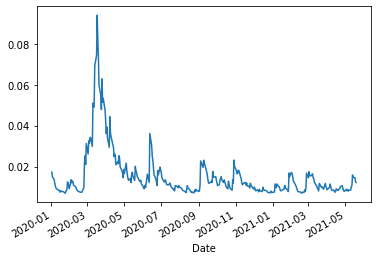

In [ ]:
res.conditional_volatility.plot()
